# Detectando Fraudes Bancárias

## Introdução<br>
Em 2016 o número de transações bancárias no Brasil atingiu a marca de 65 bilhões, um aumento de 17% em relação ao ano anterior [this][1], sendo que as operações através de *internet banking* e *mobile banking* representaram 57% do total de transações bancárias realizadas no período. Neste mesmo ano, as fraudes realizadas através de boletos bancários somaram um total de 383 milhões de reais [this][2].<br>
   
Em 2017, os bancos e instituições financeiras, desembolsaram só com despesas em segurança de tecnologia da informação um total de 2 bilhões de reais [this][3]. Nos últimos 2 anos, o número de transações bancárias realizadas através de meios digitais e o investimento em segurança aumentaram e, em contrapartida, o número de fraudes bancárias com boletos (por exemplo), vem crescendo e gerando um prejuízo considerável aos bancos e seus clientes.<br>
    
Tal prejuízo pode ser mitigado, como já é feito em transações bancárias de determinados bancos, com o uso das tecnologias em Machine Learning e Pattern Recognition, sendo possível classificar, identificar e bloquear as fraudes bancárias que estão acontecendo.<br>

## Qual é o objetivo desse estudo?<br>
Dado a importacia da identificação da autenticidade de uma transação bancária para várias instituições financeiras, propomos aqui investigar o problema de “detecção de fraudes bancárias”.<br>
    
Como não encontramos nenhuma base nacional (brasileira), utilizamos a base de dados "*Credit Card Fraud Detection. Anonymized credit card transactions labeled as fraudulent or genuine*" disponível no Kagle através do link <https://www.kaggle.com/dalpozz/creditcardfraud/data><br>

##### MELHORAR ESTA PARTE 
Abordamos os conceitos de Redes Neurais e Deep Learning para processamento dos dados, qualitativamente, esperamos resultados em números que eventualmente podem ser plotados em gráficos para um análise macro de forma visual. Utilizaremos métricas de Erros e Teste como: modelo de treino, modelo de teste, matriz de confusão, acurácia, precisão e recall.

[1]: Pesquisa FEBRABAN de Tecnologia Bancária 2017, <https://cmsportal.febraban.org.br/Arquivos/documentos/PDF/Pesquisa%20FEBRABAN%20de%20Tecnologia%20Banc%C3%A1ria%202017.pdf><br>
[2]: Fraudes com boletos somam R$ 383 milhões em 2016, segundo Febraban, <http://www.valor.com.br/financas/4864120/fraudes-com-boletos-somam-r-383-milhoes-em-2016-segundo-febraban> <br>
[3]: Combate sem trégua às fraudes eletrônicas, <https://portal.febraban.org.br/noticia/3127/pt-br/><br>

## Índice:<br>
1.  **Legenda dos Campos da Base de Dados**
*   **Checando a quantidade de registros**
*  **Limpando os dados**
*  **Realizando as análises**
*  **Visualizando as análises**
*  ***Add mais coisas.... ((((((((((((((((((((((((((((((((( ***
*  **Conclusão**

### 1. Legenda dos Campos da Base de Dados:

1. Metadados das Colunas:
    * V1 à V 28 - Componentes Principais<br>
    * Amount - *Quantidade de Transações*<br>
    * Class - As classes de classificação reais<br>

In [24]:
%matplotlib inline
import pandas as pd # Para criarmos DataFrames
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
from ggplot import *

/Users/guilherme.brunhole/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/guilherme.brunhole/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/guilherme.brunhole/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Importando a base de dados

In [2]:
creditcard = pd.read_csv('creditcard.csv', encoding='ISO-8859-1')

In [3]:
creditcard.shape

(284807, 31)

### visualizando as primeiras linhas

In [4]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Checando a quantidade de registros

In [5]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No total temos 284807 linhas com 31 colunas cada.<br>
Agora quantas delas será que não são nulas?<br>
Vamos realizar essa contagem para cada variável.

In [43]:
creditcard.isnull().values.any()

False

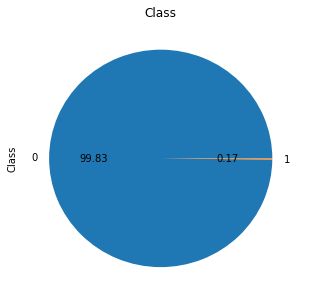

In [28]:
pie_plot = pd.Series(creditcard['Class'].groupby(creditcard['Class']).count())

pie_plot.plot(kind='pie', figsize=(5,5), autopct='%.2f', title='Class')

Como não existem valores nulos, vamos ver a comparação de tempo de transações fraudulentas e autênticas.

In [9]:
print 'Transacoes Autenticas:\n', creditcard[creditcard.Class == 0].shape
print 'Transacoes Fraudulentas:\n', creditcard[creditcard.Class == 1].shape

normal_trans = creditcard.Time[creditcard.Class == 0]
fraud_trans = creditcard.Time[creditcard.Class == 1]

print '\nTransacoes Autenticas:\n', normal_trans.describe() 
print '\nTransacoes Fraudulentas:\n', fraud_trans.describe()

Transacoes Autenticas:
(284315, 31)
Transacoes Fraudulentas:
(492, 31)

Transacoes Autenticas:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Transacoes Fraudulentas:
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


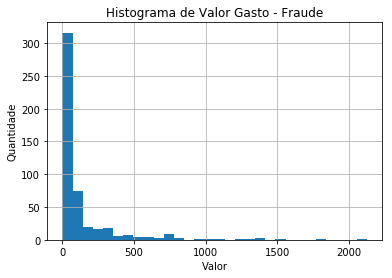

In [18]:
creditcard.Amount[creditcard.Class == 1].hist(bins = 30)
plt.title('Histograma de Valor Gasto - Fraude')
plt.ylabel('Quantidade')
plt.xlabel('Valor')

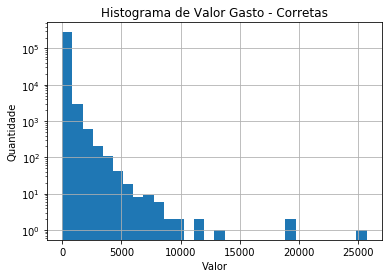

In [29]:
creditcard.Amount[creditcard.Class == 0].hist(bins = 30)
plt.title('Histograma de Valor Gasto - Corretas')
plt.ylabel('Quantidade')
plt.xlabel('Valor')
plt.yscale('log')

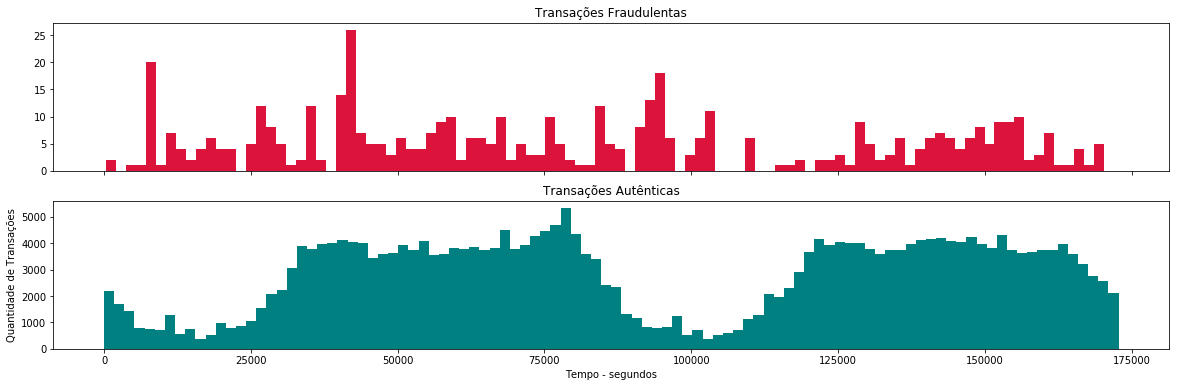

In [146]:
w, (fst, scd) = plt.subplots(2, 1, sharex=True, figsize=(20,6))

fst.set_title('Transações Fraudulentas')
cd_time_1 = creditcard.Time[creditcard.Class == 1]
fst.hist(cd_time_1, bins = 100, color='crimson')

scd.set_title('Transações Autênticas')
cd_time_0 = creditcard.Time[creditcard.Class == 0]
scd.hist(cd_time_0, bins = 100, color='teal')

plt.xlabel('Tempo - segundos')
plt.ylabel('Quantidade de Transações')
plt.show()

Podemos perceber analisando os graficos acima que o tempo não é algo que tem influência. Podemos até dizer que as transações fraudulentas estão distribuídas quase que uniformemente.

In [32]:
print 'Time:\n',format(creditcard['Time'].describe())
print '\nAmount:\n',format(creditcard['Amount'].describe())

Time:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


# Preparação dos dados


Pudemos perceber que a coluna **Amount** posssue bastantes outliers.
Uma maneira muito comum e eficiente de minimizar o efeito deles na base como um todo é realizar um scale dos valores, por exemplo transformar todos os valores para um range entre -1 e 1.

Para fazer isso usaremos o módulo [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [43]:
from sklearn.preprocessing import StandardScaler

data = creditcard.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [41]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Legal, agora já com os dados prontos iremos começar a treinar nossos modelos de Deep Learning :)



In [44]:
import keras
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import ActivityRegularization
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, quantile_transform
from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [86]:
# convert the pd dataframe to a numpy vector
X = data.drop('Class', axis = 1).values.astype(float)

# Store target column in y array
y = data.Class

# normalize values
X_norm = X # minmax_scale(X, axis = 1)
y_norm = y

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.33, random_state=42)

# Model metaparameters
nb_epoch = 60
n_samples = X_train.shape[0]
n_samples_test = y_train.shape[0]

rlrop = ReduceLROnPlateau(monitor='val_loss'
                          , factor=0.1
                          , patience=1000
                          , verbose=0
                          , mode='auto'
                          , epsilon=0.0001
                          , cooldown=4
                          , min_lr=10e-7)

early_stopping = EarlyStopping(monitor='val_loss'
                               , min_delta=0.001
                               , patience=1500)

sgd = optimizers.SGD(lr=0.001
                     , decay=1e-6
                     , momentum=0.9
                     , nesterov=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


/Users/guilherme.brunhole/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
model = Sequential() 
model.add(Dense(256, input_shape=(X_train.shape[1],), kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])

hist_model = model.fit(X_train[:n_samples]
                                 , y_train[:n_samples]
                                 , epochs=nb_epoch
                                 , batch_size=50 
                                 , validation_data=(X_test[:n_samples_test], y_test[:n_samples_test])
                                 , verbose=1
                                 , callbacks=[early_stopping, rlrop])

Train on 190820 samples, validate on 93987 samples
Epoch 1/60
190820/190820 [==============================] - 16s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 2/60
190820/190820 [==============================] - 16s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 3/60
190820/190820 [==============================] - 16s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 4/60
190820/190820 [==============================] - 16s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 9.1493e-04 - val_mean_squared_error: 9.1493e-04
Epoch 5/60
190820/190820 [==============================] - 17s - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 7.8178e-04 - val_mean_squared_error: 7.8178e-04
Epoch 6/60
190820/190820 [==============================] - 16s - loss: 9.9830e-04 - mean_squared_error: 9.9830e-04 - val_loss: 7.443

190820/190820 [==============================] - 15s - loss: 8.2400e-04 - mean_squared_error: 8.2400e-04 - val_loss: 6.4104e-04 - val_mean_squared_error: 6.4104e-04
Epoch 48/60
190820/190820 [==============================] - 15s - loss: 8.2655e-04 - mean_squared_error: 8.2655e-04 - val_loss: 6.3860e-04 - val_mean_squared_error: 6.3860e-04
Epoch 49/60
190820/190820 [==============================] - 15s - loss: 8.2664e-04 - mean_squared_error: 8.2664e-04 - val_loss: 6.3600e-04 - val_mean_squared_error: 6.3600e-04
Epoch 50/60
190820/190820 [==============================] - 16s - loss: 8.3641e-04 - mean_squared_error: 8.3641e-04 - val_loss: 6.3591e-04 - val_mean_squared_error: 6.3591e-04
Epoch 51/60
190820/190820 [==============================] - 16s - loss: 8.4265e-04 - mean_squared_error: 8.4265e-04 - val_loss: 6.3696e-04 - val_mean_squared_error: 6.3696e-04
Epoch 52/60
190820/190820 [==============================] - 15s - loss: 8.5549e-04 - mean_squared_error: 8.5549e-04 - val_loss

# Visualize MSE. & Loss

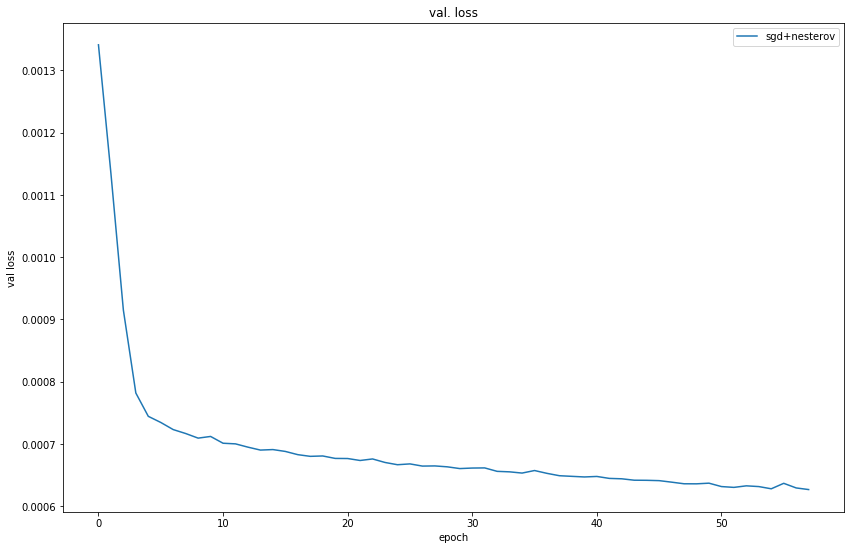

In [88]:
plt.plot(hist_model.history['val_loss'][1:-1])  
plt.title('val. loss')  
plt.ylabel('val loss')  
plt.xlabel('epoch')  
plt.legend(['sgd+nesterov'], loc='upper right')  

plt.show()

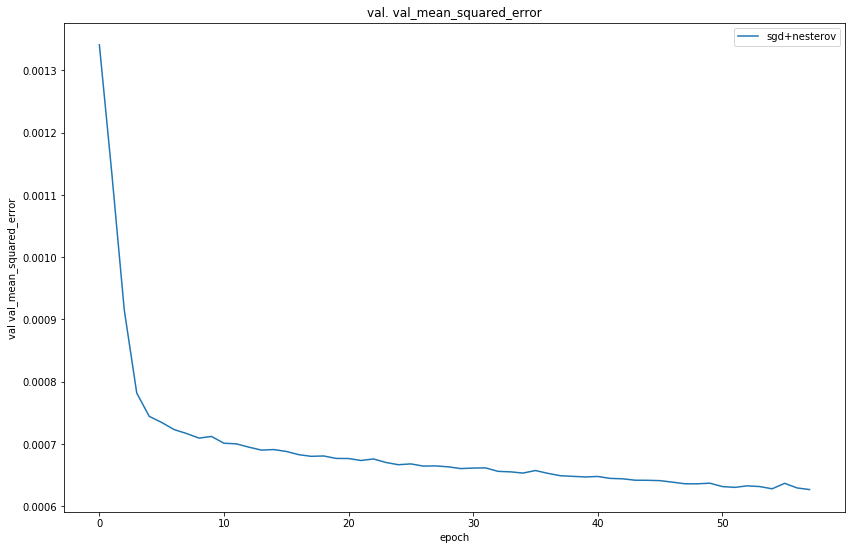

In [89]:
plt.plot(hist_model.history['val_mean_squared_error'][1:-1])  
plt.title('val. val_mean_squared_error')  
plt.ylabel('val val_mean_squared_error')  
plt.xlabel('epoch')  
plt.legend(['sgd+nesterov'], loc='upper right')  

plt.show()

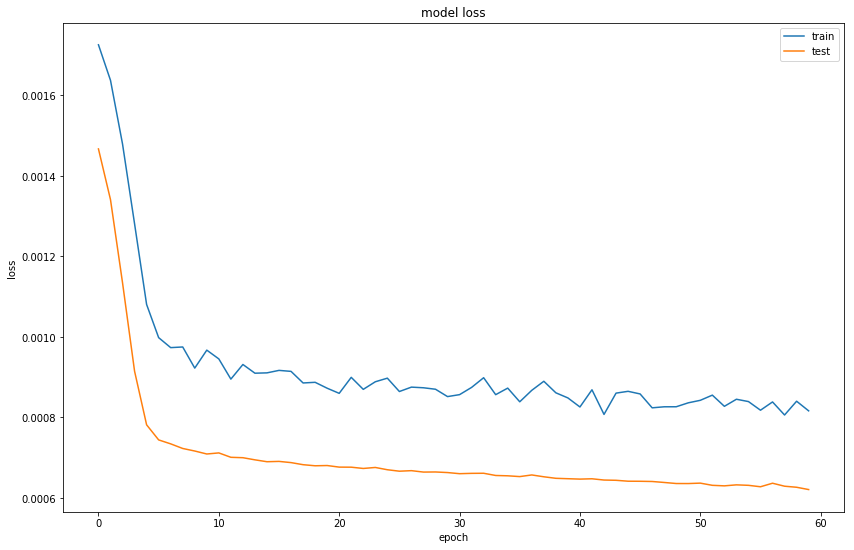

In [90]:
plt.plot(hist_model.history['loss'])
plt.plot(hist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [91]:
predictions = model.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,93987.000000,93987.000000
mean,1.083112,0.001585
std,3.866195,0.039785
min,0.148072,0.000000
25%,0.422435,0.000000
50%,0.632169,0.000000
75%,0.970899,0.000000
max,276.242485,1.000000


## Reconstruction error without fraud

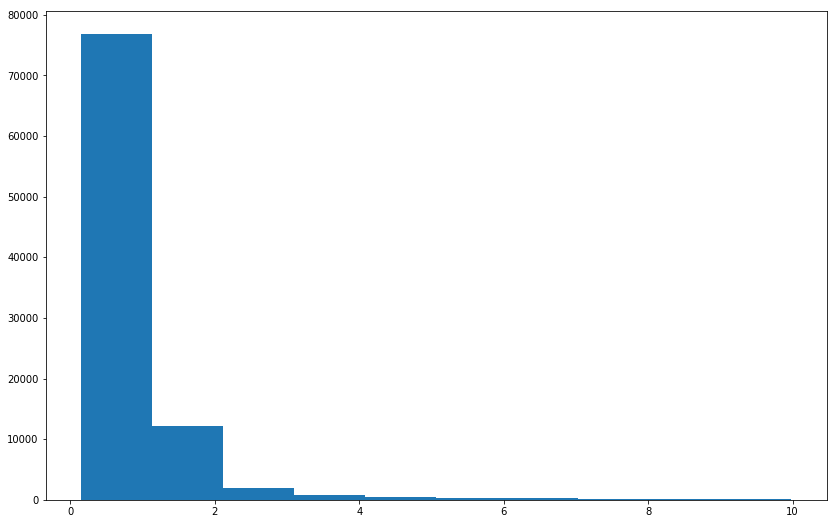

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

## Reconstruction error with fraud

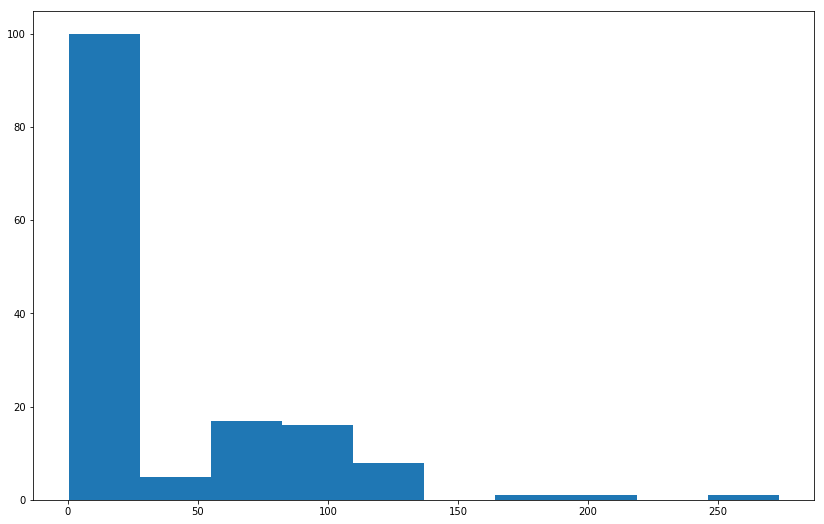

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [94]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

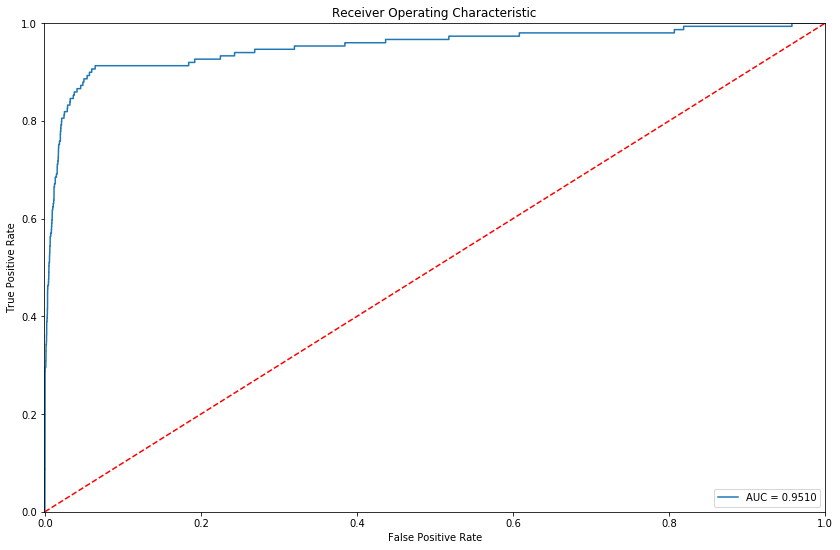

In [95]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

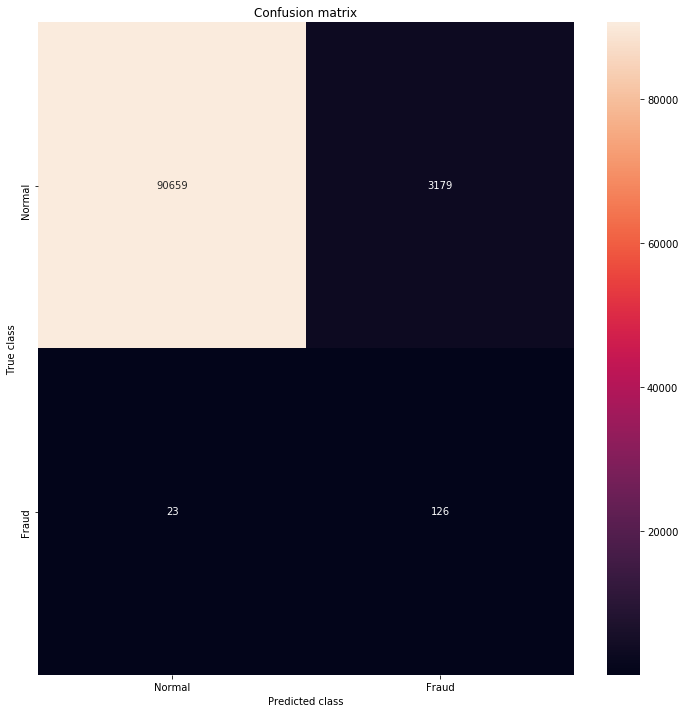

In [98]:
threshold = 2.9
LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()